In [27]:
# Kennedi Todd
# August 5, 2024
# Chapter 9: Linear Regression

# import libraries
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# read data
df = pd.read_csv('Melbourne_housing_FULL.csv')

# exploratory data analysis
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [28]:
# principle of parsimony, limiting analysis to variables contributing most to variance
df.drop(['Address','Method','SellerG','Date','Postcode','YearBuilt','Type','Lattitude',
        'Longtitude','Regionname','Suburb','CouncilArea'],
       axis = 1,
       inplace = True)
df.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount
0,2,NaN,2.5,2.0,1.0,1.0,126.0,NaN,4019.0
1,2,1480000.0,2.5,2.0,1.0,1.0,202.0,NaN,4019.0
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,4019.0
3,3,NaN,2.5,3.0,2.0,1.0,0.0,NaN,4019.0
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,4019.0


In [29]:
# inspect missing values
df.isnull().sum()

Rooms                0
Price             7610
Distance             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Propertycount        3
dtype: int64

In [30]:
# dimensions
df.shape

(34857, 9)

<Axes: >

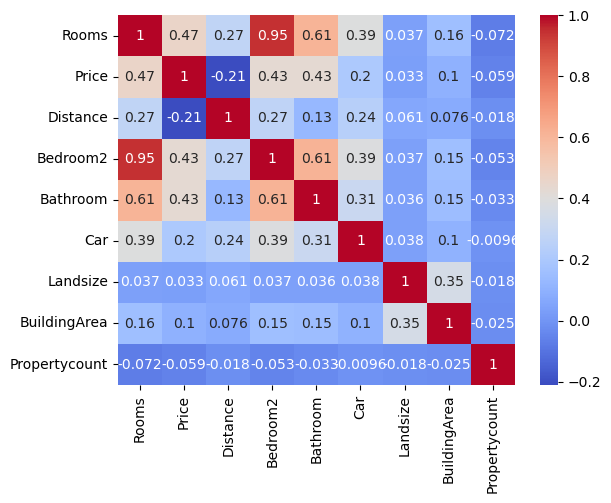

In [31]:
# correlation heatmap
df_heat = df.corr()
sns.heatmap(df_heat,
           annot = True,
           cmap = 'coolwarm')

In [32]:
# remove variables with high correlation
# remove variables with extremely low correlation to dependent var (price)
df.drop(['Bedroom2','Landsize','Propertycount'],
        axis = 1,
        inplace = True)
df.head()

,Rooms,Price,Distance,Bathroom,Car,BuildingArea
0,2,NaN,2.5,1.0,1.0,NaN
1,2,1480000.0,2.5,1.0,1.0,NaN
2,2,1035000.0,2.5,1.0,0.0,79.0
3,3,NaN,2.5,2.0,1.0,NaN
4,3,1465000.0,2.5,2.0,0.0,150.0


In [33]:
# remove or modify variables with missing values
df.isnull().sum()

Rooms               0
Price            7610
Distance            1
Bathroom         8226
Car              8728
BuildingArea    21115
dtype: int64

In [34]:
# mean can be used to fill variables with partial correlation to price (Car)
# remove rows for variables with a small number of missing values (Distance)
# avoid filling values for variales with significant correlation to Price (Bathroom), remove rows
del df['BuildingArea'] # remove, many missing, 0.1 corr
# fill Car with mean
df.fillna({'Car': df['Car'].mean()}, inplace = True)
# drop remaining row-by-row
df.dropna(axis = 0,
         how = 'any',
         subset = None,
         inplace = True)

# inspect
df.shape

(20800, 5)

In [35]:
df.head()

,Rooms,Price,Distance,Bathroom,Car
1,2,1480000.0,2.5,1.0,1.0
2,2,1035000.0,2.5,1.0,0.0
4,3,1465000.0,2.5,2.0,0.0
5,3,850000.0,2.5,2.0,1.0
6,4,1600000.0,2.5,1.0,2.0


In [36]:
# set X and y variables
X = df[['Rooms','Distance','Bathroom','Car']]
y = df['Price']

# split training/testing data 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.3,
                                                   random_state = 10,
                                                   shuffle = True)

# set algorithm
model = LinearRegression()

# link training data to algorithm
model.fit(X_train, y_train)

# find y-intercept and X coefficients
model.intercept_

np.float64(282725.3156777688)

In [37]:
model.coef_

array([269450.10790036, -37787.76622417, 207173.05927097,  47417.17159475])

In [38]:
# reformat coefficients
model_results = pd.DataFrame(model.coef_,
                            X.columns,
                            columns = ['Coefficients'])
model_results

,Coefficients
Rooms,269450.107900
Distance,-37787.766224
Bathroom,207173.059271
Car,47417.171595


In [39]:
# predict
new_house = [
    2,   # rooms
    2.5, # distance
    1,   # bathroom
    1    # car
]
new_house_predict = model.predict([new_house])
new_house_predict

/Users/kenneditodd/miniconda3/envs/jupyter/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([981746.34678378])

In [40]:
# the predicted value is AUD $981,746.347
# the actual value according to the dataset is AUD $1,480,000

# evaluate
prediction = model.predict(X_test)
metrics.mean_absolute_error(y_test, prediction)

np.float64(363782.9423236326)

In [ ]:
# the model miscalculates by $363,782
# not completely unexpected since we remove 16 variables from data set
# in future use one-hot encoding for Type (House, Unit, Apartment)
# Note: linear regression is not known for accuracy, but it's really fast